# Decision Tree
A Decision Tree is a versatile machine learning algorithm that can be used for both classification and regression tasks. It splits the data into subsets based on the feature values, creating a tree-like model of decisions.

Accuracy: 0.8
Confusion Matrix:
 [[7 0]
 [4 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



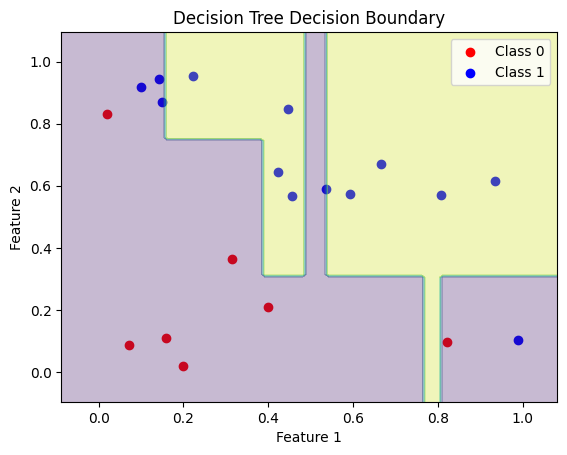

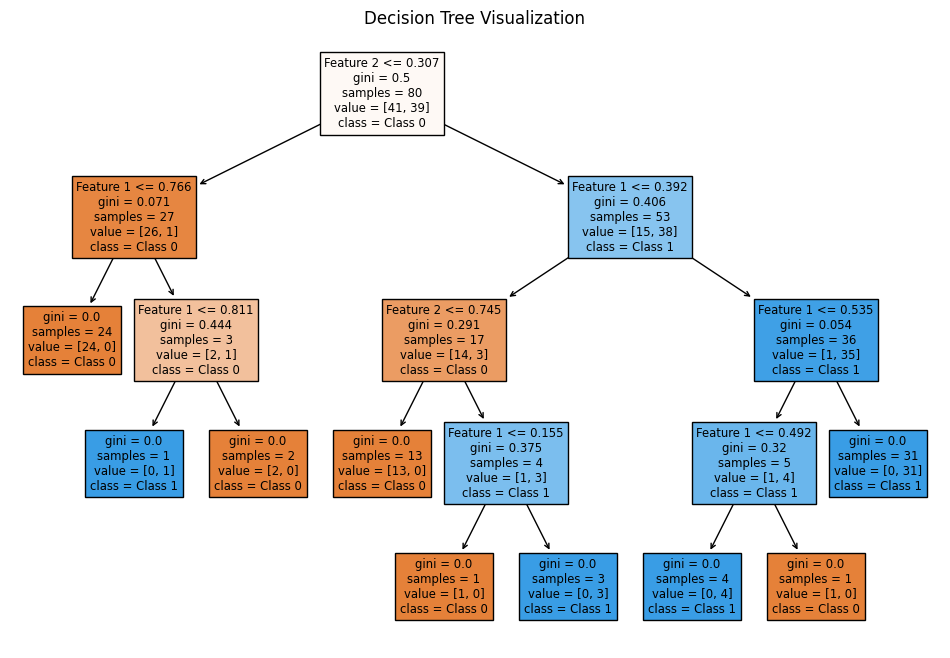

In [1]:
# Decision Tree Classification Notebook

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic binary classification data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Class 1 if the sum of the features is greater than 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualize the results
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Visualization')
plt.show()

### Explanation of Code Components

1. **Data Generation**: Synthetic binary classification data is created where points are classified based on the sum of two features.

2. **Data Preprocessing**: The dataset is split into training and testing sets.

3. **Model Training**: A Decision Tree classifier is trained using the training data.

4. **Prediction**: Predictions are made on the test set.

5. **Model Evaluation**:
   - **Accuracy**: The proportion of correctly classified instances.
   - **Confusion Matrix**: A table used to describe the performance of the classification model.
   - **Classification Report**: Includes precision, recall, and F1-score for each class.

6. **Visualization**: 
   - A scatter plot displays the actual class distribution in the test set.
   - The decision boundary created by the Decision Tree model is visualized using contour plots.
   - The structure of the trained Decision Tree is visualized using the `plot_tree` function.

### Note
- Decision Trees can easily overfit the data, especially with deep trees. You can use parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` to control the complexity of the tree and prevent overfitting.
- Decision Trees are also sensitive to noisy data.